In [ ]:
import sys, asyncio
from pathlib import Path

if sys.platform == "win32":
    asyncio.set_event_loop_policy(asyncio.WindowsProactorEventLoopPolicy())

import chess
import chess.svg
import pandas as pd
from IPython.display import SVG, display

import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime

from .prompt import generate_data_sample
from .chess_explainer import ChessExplainer

ImportError: attempted relative import with no known parent package

In [ ]:
engine_path = Path("./stockfish/stockfish-windows-x86-64-avx2.exe")
explainer = ChessExplainer(engine_path=engine_path, depth=18, multipv=15, think_time=0.3)

# Also import our data
df = pd.read_csv('prog_data/train_20k.csv')   # Import prog_data/train_20k.csv instead

## Test Prog Data Gen

2r4k/6pp/5P2/n1r3B1/4p3/P2b4/1P3R2/K2R4 b - - 0 55


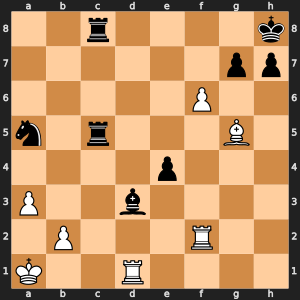

System Prompt:
------------------------------------------------------------
<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a chess grandmaster currently playing a very strong opponent. Assume they will be playing optimally. 

Shortly you'll be provided with a board state by the user -- please analyze it and think through your possible moves.

You should refer to moves in UCI notation (e.g., d7d5) and should include your thinking in think tags (e.g., <think> your_thinking </think>) and your answer in answer tags (e.g., <answer> UCI_move </answer>). 

As a technique you may want to consider enumerating possible moves and simulating the likely trajectory that would ensue.<|eot_id|>

User Prompt:
------------------------------------------------------------
<|start_header_id|>user<|end_header_id|>
8| . . r . . . . k
7| . . . . . . p p
6| . . . . . P . .
5| n . r . . . B .
4| . . . . p . . .
3| P . . b . . . .
2| . P . . . R . .
1| K . . R . . . .
   _ _ _ _ _ _ _ _
   A

In [ ]:
# Optionally can test various parts of the generation
df = df.sample(frac=1).reset_index(drop=True)
fen = df.iloc[0]['FEN']
board = chess.Board(fen)
print(fen)

display(SVG(chess.svg.board(board=board, size=300)))

# Analyze postion
results, final_statement, best_move_uci = explainer.analyze_position(fen, generate_explanation=True)
explanations = [move['explanation'] for move in results]
sys, user, model = generate_data_sample(fen, explanations, final_statement, best_move_uci)

print(f"System Prompt:\n{'-'*60}\n{sys}\n")
print(f"User Prompt:\n{'-'*60}\n{user}\n")
print(f"Prog Gen Reasoning:\n{'-'*60}\n{model}\n")

## Generate Tons of Samples

In [ ]:
# epochs = 10

# for epoch in range(epochs):
#     num_samples = 1000

#     # === DATA GENERATION ===
#     samples = []
#     for i in range(num_samples):

#         if (i+1) % 100 == 0:
#             print(f"[{i+1:<4}/{num_samples}]")

#         df = df.sample(frac=1).reset_index(drop=True)
#         fen = df.iloc[0]['FEN']
#         board = chess.Board(fen)
#         # display(SVG(chess.svg.board(board=board, size=300)))

#         # Generate our data and get our train data formatted
#         results, final_statement, best_move_uci = explainer.analyze_position(fen, generate_explanation=True)
#         explanations = [move['explanation'] for move in results]
#         sys, user, model = generate_data_sample(fen, explanations, final_statement, best_move_uci)

#         samples.append({'chat': [['system', {sys}], ['user', {user}], ['assistant', {model}]]})

# TODO: Change to 'SAVE TO JSONL'
# ENSURE THIS MATCHES YOUR COMBINED_CHESSEXPLAINER_5K.JSONL FILE
# raise()

#     # === SAVE TO PARQUET ===
#     now = datetime.now()
#     save_filename = f"explanations_{epoch}_{num_samples}_{now.hour:02d}{now.minute:02d}_{now.day:02d}.parquet"
#     save_path = Path("prog_data") / save_filename

#     # Convert to pyarrow Table and save
#     table = pa.Table.from_pandas(pd.DataFrame(samples))
#     save_path.parent.mkdir(exist_ok=True)
#     pq.write_table(table, save_path)
#     print(f"Saved {len(samples)} samples to {save_path}")

[100 /1000]
[200 /1000]
[300 /1000]
[400 /1000]
[500 /1000]
[600 /1000]
[700 /1000]
[800 /1000]
[900 /1000]
[1000/1000]
Saved 1000 samples to prog_data\explanations_0_1000_0104_16.parquet
[100 /1000]
[200 /1000]
[300 /1000]
[400 /1000]
[500 /1000]
[600 /1000]
[700 /1000]
[800 /1000]
[900 /1000]
[1000/1000]
Saved 1000 samples to prog_data\explanations_1_1000_0330_16.parquet
[100 /1000]
[200 /1000]
[300 /1000]
[400 /1000]
[500 /1000]
[600 /1000]
[700 /1000]
[800 /1000]
[900 /1000]
[1000/1000]
Saved 1000 samples to prog_data\explanations_2_1000_0557_16.parquet
[100 /1000]
[200 /1000]
[300 /1000]
[400 /1000]
[500 /1000]
[600 /1000]
[700 /1000]
[800 /1000]
[900 /1000]
[1000/1000]
Saved 1000 samples to prog_data\explanations_3_1000_0826_16.parquet


KeyboardInterrupt: 

## View our Generations

In [4]:
import pyarrow.parquet as pq
import pandas as pd
from pathlib import Path

# Provide the filename of the Parquet file you want to sample from
filename = "explanations_0_1000_0104_16.parquet"  

parquet_dir = Path('prog_data')
selected_file = parquet_dir / filename

table = pq.read_table(selected_file)
df_samples = table.to_pandas()

FileNotFoundError: prog_data/explanations_0_1000_0104_16.parquet

In [ ]:
# Sample and print a single random row
sampled = df_samples.sample(n=1)
row = sampled.iloc[0]
print("Prompt:\n", row['prompt'])
print("Completion:\n", row['completion'])
print("-"*40)

Prompt:
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a chess grandmaster currently playing a very strong opponent. Assume they will be playing optimally. 

Shortly you'll be provided with a board state by the user -- please analyze it and think through your possible moves.

You should refer to moves in UCI notation (e.g., d7d5) and should include your thinking in think tags (e.g., <think> your_thinking </think>) and your answer in answer tags (e.g., <answer> UCI_move </answer>). 

As a technique you may want to consider enumerating possible moves and simulating the likely trajectory that would ensue.<|eot_id|>
<|start_header_id|>user<|end_header_id|>
8| . k . . . . r .
7| . p p . . . . .
6| p . n . . . . .
5| . . . . . . . .
4| . b . p . . p R
3| . P . . . . . .
2| P B P N . . . .
1| . . K R r . . .
   _ _ _ _ _ _ _ _
   A B C D E F G H

- It is Black’s turn to move.
- No castling rights available.
- No en passant target square.
- Halfmove clock: 4
- Fullmove nu